In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('cars.csv')
df.head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
0,Chevrolet Aveo 4dr,False,False,False,False,False,False,False,11690,10965,1.6,4,103,28.0,34.0,2370.0,98.0,167.0,66.0
1,Chevrolet Aveo LS 4dr hatch,False,False,False,False,False,False,False,12585,11802,1.6,4,103,28.0,34.0,2348.0,98.0,153.0,66.0
2,Chevrolet Cavalier 2dr,False,False,False,False,False,False,False,14610,13697,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0
3,Chevrolet Cavalier 4dr,False,False,False,False,False,False,False,14810,13884,2.2,4,140,26.0,37.0,2676.0,104.0,183.0,68.0
4,Chevrolet Cavalier LS 2dr,False,False,False,False,False,False,False,16385,15357,2.2,4,140,26.0,37.0,2617.0,104.0,183.0,69.0


In [3]:
# print dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         428 non-null    object 
 1   sports_car   428 non-null    bool   
 2   suv          428 non-null    bool   
 3   wagon        428 non-null    bool   
 4   minivan      428 non-null    bool   
 5   pickup       428 non-null    bool   
 6   all_wheel    428 non-null    bool   
 7   rear_wheel   428 non-null    bool   
 8   msrp         428 non-null    int64  
 9   dealer_cost  428 non-null    int64  
 10  eng_size     428 non-null    float64
 11  ncyl         428 non-null    int64  
 12  horsepwr     428 non-null    int64  
 13  city_mpg     414 non-null    float64
 14  hwy_mpg      414 non-null    float64
 15  weight       426 non-null    float64
 16  wheel_base   426 non-null    float64
 17  length       402 non-null    float64
 18  width        400 non-null    float64
dtypes: bool(

In [61]:
# dataset dimentions
df.shape

(428, 19)

In [4]:
# generate descriptive statistic 
df.describe()

,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
count,428.000000,428.000000,428.000000,428.000000,428.000000,414.000000,414.000000,426.000000,426.000000,402.000000,400.000000
mean,32774.855140,30014.700935,3.196729,5.775701,215.885514,20.089372,26.905797,3577.213615,108.173709,185.126866,71.292500
std,19431.716674,17642.117750,1.108595,1.622779,71.836032,5.213062,5.696804,760.437663,8.326449,13.312523,3.393484
min,10280.000000,9875.000000,1.300000,-1.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,177.000000,69.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,186.000000,71.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.000000,29.000000,3974.250000,112.000000,193.000000,73.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,227.000000,81.000000


In [55]:
# Cars by type
car_type_data = [['Sports Car', df.sports_car.value_counts().loc[True]],\
                ['SUV', df.suv.value_counts().loc[True]],\
                ['Wagon', df.wagon.value_counts().loc[True]],\
                ['Minivan', df.minivan.value_counts().loc[True]],\
                ['Pickup', df.pickup.value_counts().loc[True]]] 
car_types = pd.DataFrame(car_type_data, columns=['car_type', 'count'])
car_types.head()

,car_type,count
0,Sports Car,49
1,SUV,60
2,Wagon,30
3,Minivan,20
4,Pickup,24


In [56]:
# sort types by count
car_types = car_types.sort_values(by='count', ascending=False)
car_types.head()

,car_type,count
1,SUV,60
0,Sports Car,49
2,Wagon,30
4,Pickup,24
3,Minivan,20


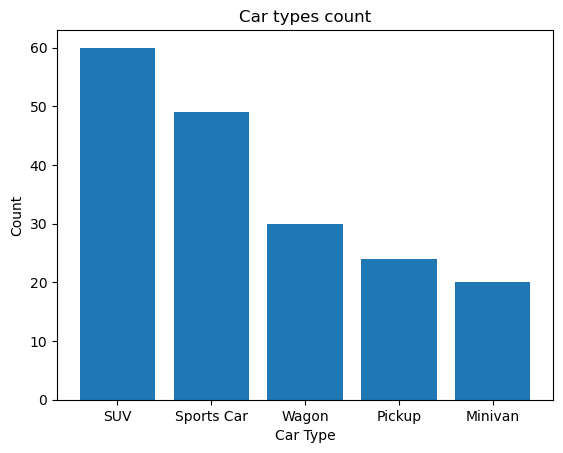

In [57]:

car_type = car_types['car_type'].values.tolist()
count = car_types['count'].values.tolist()

plt.bar(car_type, count)
plt.title('Car types count')
plt.ylabel('Count')
plt.xlabel('Car Type')
plt.show()

In [58]:
# number of cylinders in engine, negative number of cylinder defenitly can't be 
df['ncyl'].value_counts()

 6     190
 4     136
 8      87
 5       7
 12      3
 10      2
-1       2
 3       1
Name: ncyl, dtype: int64

In [59]:
# let's see which are with 0 or less cylinders
df.loc[df['ncyl'] <=0 ].head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width
271,Mazda RX-8 4dr automatic,True,False,False,False,False,False,True,25700,23794,1.3,-1,197,18.0,25.0,3053.0,106.0,174.0,NaN
272,Mazda RX-8 4dr manual,True,False,False,False,False,False,True,27200,25179,1.3,-1,238,18.0,24.0,3029.0,106.0,174.0,NaN


In [62]:
# drop rows with incorrect number of engine cylinders and verify the result
df = df.drop(df.loc[df['ncyl'] <=0 ].index)
df.loc[df['ncyl'] <=0 ].head()

,name,sports_car,suv,wagon,minivan,pickup,all_wheel,rear_wheel,msrp,dealer_cost,eng_size,ncyl,horsepwr,city_mpg,hwy_mpg,weight,wheel_base,length,width


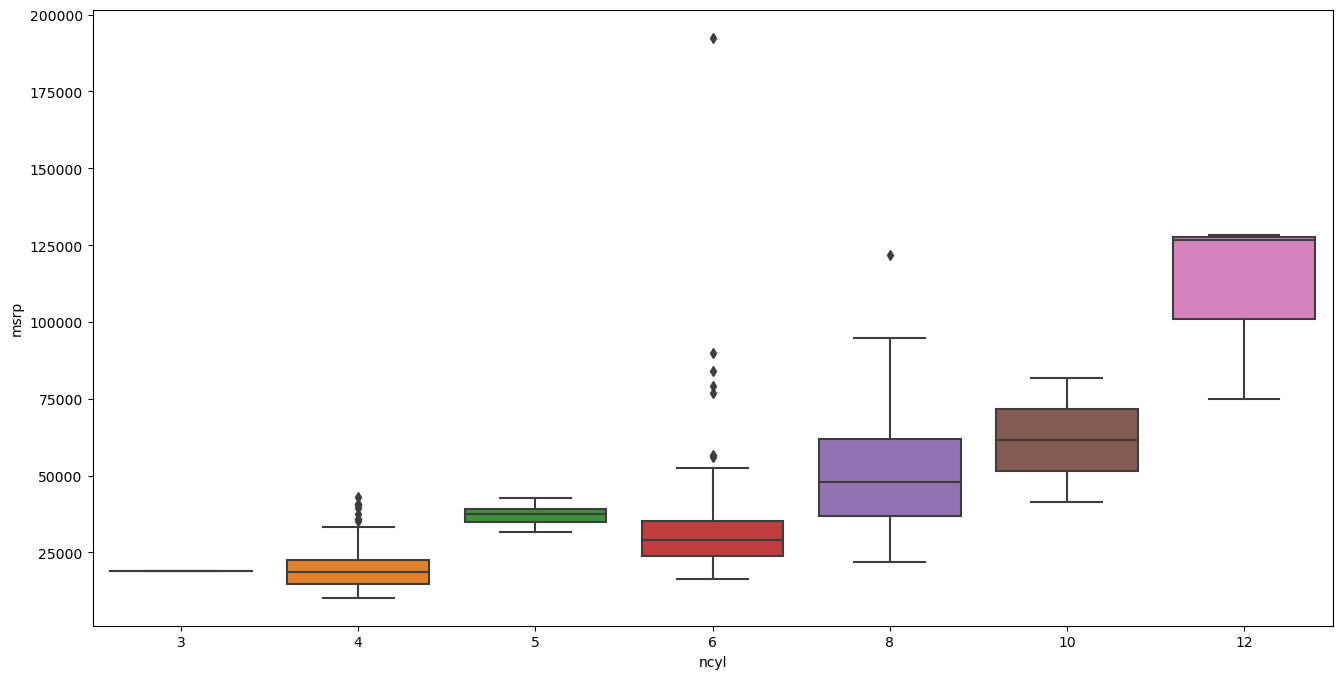

In [63]:
# correlation between cylinders and price
data_plot = df[['msrp', 'ncyl']]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='ncyl', y='msrp', data=data_plot)